# 데이터셋 임포트

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('/content/drive/MyDrive/제로베이스/제로베이스_팀프로젝트')

In [3]:
import pandas as pd

In [ ]:
import chardet
filename = 'Customer_info.csv'
with open(filename, 'rb') as f:
  result = chardet.detect(f.readline())
  print(result['encoding'])

utf-8


# 한글 폰트 설치

In [4]:
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths = ['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
        fm.fontManager.addfont(fpath)

# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
df_cust = pd.read_csv('Customer_info.csv', encoding = 'utf-8')
df_discount = pd.read_csv('Discount_info.csv', encoding='utf-8')
df_marketing = pd.read_csv('Marketing_info.csv', encoding='utf-8')
df_sales = pd.read_csv('Onlinesales_info.csv', encoding='utf-8')
df_tax = pd.read_csv('Tax_info.csv', encoding='utf-8')

In [ ]:
df_cust.head(5)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
df_discount.head(5)

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
df_marketing.head(5)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
df_sales.head(5)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
df_tax.head(5)

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


# 전처리

## Customer_info.csv (df_cust)

In [ ]:
df_cust.head(5)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
df_cust.isnull().sum()

,0
고객ID,0
성별,0
고객지역,0
가입기간,0


➡ 결측치 없음

In [ ]:
df_cust.describe()

,가입기간
count,1468.000000
mean,25.912125
std,13.959667
min,2.000000
25%,14.000000
50%,26.000000
75%,38.000000
max,50.000000


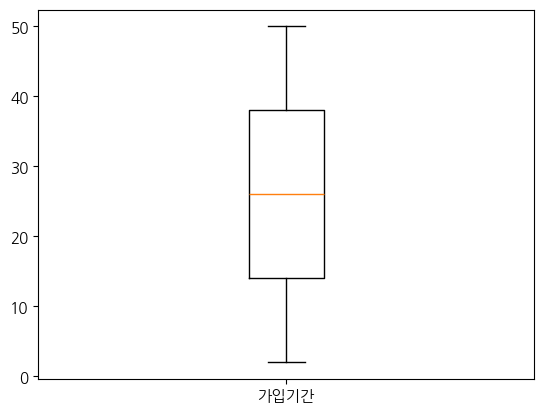

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(df_cust['가입기간'])
plt.xticks([1], ['가입기간'])
plt.show()

➡ 눈에 띄는 outlier 없음

In [ ]:
df_cust[df_cust.duplicated('고객ID')]

,고객ID,성별,고객지역,가입기간


➡ 중복된 고객 ID 없음

In [ ]:
df_cust['성별'].unique()

array(['남', '여'], dtype=object)

In [ ]:
df_cust['고객지역'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

➡ 딱히 수정이 필요한 값은 안 보임

---

## Discount_info.csv (df_discount)

In [ ]:
df_discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [ ]:
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
df_discount.describe()

,할인율
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


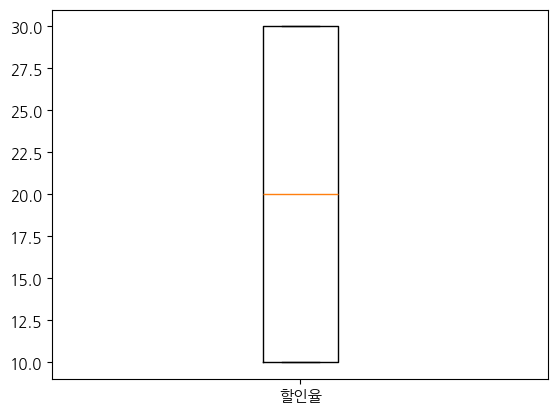

In [ ]:
plt.boxplot(df_discount['할인율'])
plt.xticks([1], ['할인율'])
plt.show()

➡ 눈에 띄는 outlier 없음

In [ ]:
df_discount.isnull().sum()

,0
월,0
제품카테고리,0
쿠폰코드,0
할인율,0


➡ 결측치 없음

In [ ]:
df_discount[df_discount.duplicated(['쿠폰코드'], keep=False)].sort_values(by='쿠폰코드')

,월,제품카테고리,쿠폰코드,할인율
39,Jan,Accessories,ACC10,10
141,Jul,Accessories,ACC10,10
192,Oct,Accessories,ACC10,10
90,Apr,Accessories,ACC10,10
142,Aug,Accessories,ACC20,20
...,...,...,...,...
130,Aug,Waze,WEMP20,20
29,Mar,Waze,WEMP30,30
182,Dec,Waze,WEMP30,30
131,Sep,Waze,WEMP30,30


➡ 쿠폰 코드가 쿠폰의 고유 ID처럼 사용되고 있음

➡ 즉, 다른 기간이더라도 같은 종류의 쿠폰이면 쿠폰 코드는 동일함을 확인

---

## Marketing_info.csv (df_marketing)

In [ ]:
df_marketing.head(5)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


### datetime 형으로 변경

In [ ]:
df_marketing['날짜'] = pd.to_datetime(df_marketing['날짜'])

In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      365 non-null    datetime64[ns]
 1   오프라인비용  365 non-null    int64         
 2   온라인비용   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


➡ 날짜를 string에서 datetime으로 변환

In [ ]:
df_marketing.isnull().sum()

,0
날짜,0
오프라인비용,0
온라인비용,0


➡ 결측치 없음

In [ ]:
df_marketing.describe()

,날짜,오프라인비용,온라인비용
count,365,365.000000,365.000000
mean,2019-07-02 00:00:00,2843.561644,1905.880740
min,2019-01-01 00:00:00,500.000000,320.250000
25%,2019-04-02 00:00:00,2500.000000,1258.600000
50%,2019-07-02 00:00:00,3000.000000,1881.940000
75%,2019-10-01 00:00:00,3500.000000,2435.120000
max,2019-12-31 00:00:00,5000.000000,4556.930000
std,NaN,952.292448,808.856853


➡ 음수값과 같은 눈에 띄는 Outlier 없음

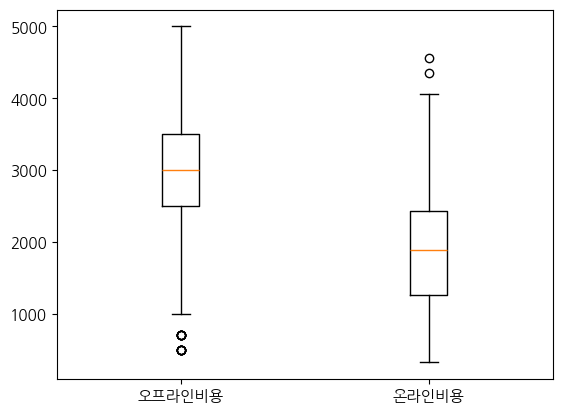

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([df_marketing['오프라인비용'], df_marketing['온라인비용']])
plt.xticks([1, 2], ['오프라인비용', '온라인비용'])
plt.show()

➡ 오프라인 비용의 작은 값과 온라인 비용의 큰 값에서 다소 Outlier가 존재함

➡ 이후 분석 방향에 따라 데이터 정제가 필요할 경우 처리

In [ ]:
df_marketing[df_marketing.duplicated('날짜')]

,날짜,오프라인비용,온라인비용


➡ 중복되는 날짜 없음

---

## Onlinesales_info.csv (df_sales)

In [6]:
df_sales.head(5)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


### datetime 형으로 변경

In [ ]:
df_sales['거래날짜'] = pd.to_datetime(df_sales['거래날짜'])

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.6+ MB


➡ 거래 날짜를 string에서 datetime으로 변환

In [ ]:
df_sales.describe()

,거래날짜,수량,평균금액,배송료
count,52924,52924.000000,52924.000000,52924.000000
mean,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630
min,2019-01-01 00:00:00,1.000000,0.390000,0.000000
25%,2019-04-12 00:00:00,1.000000,5.700000,6.000000
50%,2019-07-13 00:00:00,1.000000,16.990000,6.000000
75%,2019-09-27 00:00:00,2.000000,102.130000,6.500000
max,2019-12-31 00:00:00,900.000000,355.740000,521.360000
std,NaN,20.104711,64.006882,19.475613


➡ 음수값과 같은 이상치는 없으나, 배송료에서 Outlier 존재 가능성을 확인

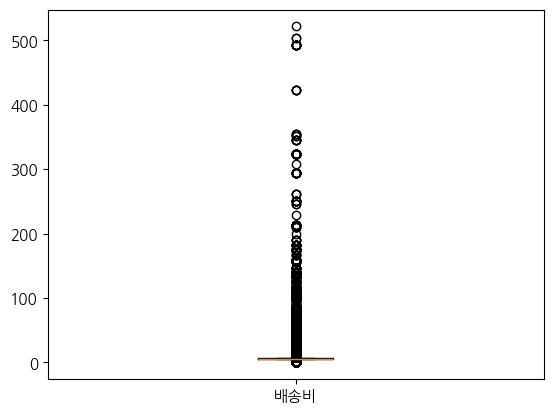

In [ ]:
plt.boxplot(df_sales['배송료'])
plt.xticks([1], ['배송비'])
plt.show()

➡ 배송료의 경우, 값이 큰 이상치가 다수 존재함

➡ 이후 분석 방향에 따라 배송료에 대한 데이터 정제가 필요할 수 있음

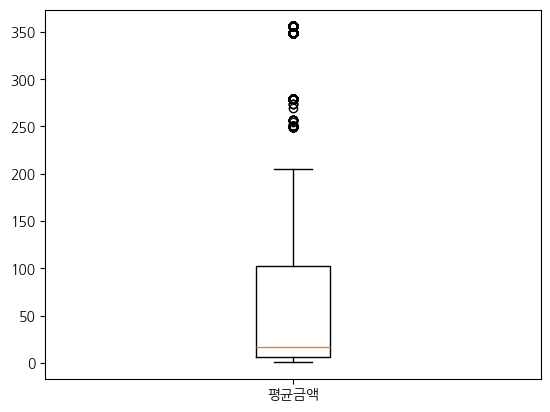

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(df_sales['평균금액'])
plt.xticks([1], ['평균금액'])

plt.show()

In [ ]:
df_sales.isnull().sum()

,0
고객ID,0
거래ID,0
거래날짜,0
제품ID,0
제품카테고리,0
수량,0
평균금액,0
배송료,0
쿠폰상태,0


➡ 결측치 없음

---

## Tax_info.csv (df_tax)

In [ ]:
df_tax.head(5)

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
df_tax.shape

(20, 2)

In [ ]:
df_tax.isnull().sum()

,0
제품카테고리,0
GST,0


➡ 결측치 없음

In [ ]:
df_tax['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [ ]:
df_tax['제품카테고리'].nunique()

20

➡ 중복값 없음

In [ ]:
df_tax.describe()

,GST
count,20.000000
mean,0.116500
std,0.052443
min,0.050000
25%,0.087500
50%,0.100000
75%,0.180000
max,0.180000


In [ ]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


---

# ============================================

# 세그먼트 분류할 지표 뽑기

- 가입기간
- recency
- 거래 빈도 (frequency)
- 총 금액 (monetary)

단, 다중공선성을 방지하기 위해 네 가지 지표에서 corr 값이 큰 쌍 확인하기

In [ ]:
df_cust.head(2)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43


In [ ]:
df_sales.head(1)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used


In [ ]:
df_sales['Total'] = df_sales['수량'] * df_sales['평균금액']

In [ ]:
df_sales_group = pd.merge(df_sales.groupby('고객ID', as_index=False)['거래날짜'].max(),
                          df_sales.groupby('고객ID', as_index=False)['Total'].sum(),
                          how = 'left', on = '고객ID')
df_sales_group.head()

,고객ID,거래날짜,Total
0,USER_0000,2019-09-15,30.99
1,USER_0001,2019-11-02,13834.90
2,USER_0002,2019-10-19,1442.12
3,USER_0003,2019-12-14,1360.07
4,USER_0004,2019-09-15,1442.47


In [ ]:
seg = df_cust.copy()
seg.drop(['성별', '고객지역'], axis = 1, inplace=True)
seg = pd.merge(seg, df_sales_group, how='left', on='고객ID')
seg.head(3)

,고객ID,가입기간,거래날짜,Total
0,USER_1358,12,2019-01-26,34551.40
1,USER_0190,43,2019-12-18,3048.79
2,USER_0066,33,2019-08-02,2361.48


In [ ]:
seg['Recency'] = (seg['거래날짜'].max() - seg['거래날짜']).dt.days

In [ ]:
seg.head(3)

,고객ID,가입기간,거래날짜,Total,Recency
0,USER_1358,12,2019-01-26,34551.40,339
1,USER_0190,43,2019-12-18,3048.79,13
2,USER_0066,33,2019-08-02,2361.48,151


In [ ]:
freq = df_sales.groupby('고객ID', as_index=False).size()
freq.columns = ['고객ID', 'Frequency']
freq.head()

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36


In [ ]:
seg = pd.merge(seg, freq, how='left', on='고객ID')
seg.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency
0,USER_1358,12,2019-01-26,34551.40,339,297
1,USER_0190,43,2019-12-18,3048.79,13,44
2,USER_0066,33,2019-08-02,2361.48,151,42
3,USER_0345,30,2019-01-01,1.24,364,1
4,USER_0683,49,2019-08-30,1043.72,123,6


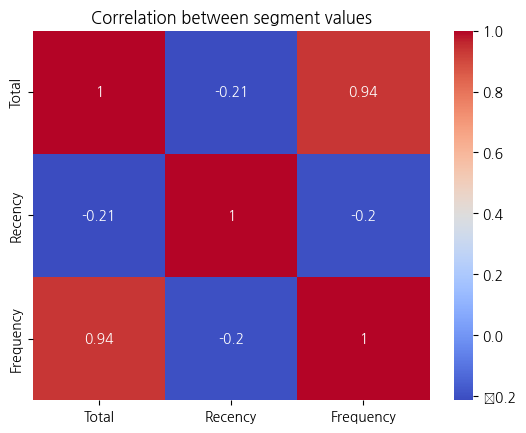

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
ax = sns.heatmap(seg.drop(['고객ID', '거래날짜', '가입기간'], axis=1).corr(),
                 annot=True,
                 cmap = 'coolwarm')
plt.title('Correlation between segment values')
plt.show()

- Total(=총 지출 금액, Monetary)과 Frequency(구매 빈도) 사이의 상관관계가 0.94로 매우 높아, 다중공선성을 유발할 수 있음 (= 특정 변수는 고려하지 않은 클러스터링 결과 도출될 수 있음)

- 따라서 둘 중 Total을 제외하고, 대신에 평균 지출 금액을 추가하여 상관관계를 다시 보기로 함

## Monetary : 총 금액 대신 건당 평균 금액으로 변경

In [ ]:
seg = pd.merge(seg,
               df_sales.groupby('고객ID', as_index=False)['Total'].mean(),
               how = 'left',
               on = '고객ID')

In [ ]:
seg.rename(columns={'Total_x' : 'Total',
                    'Total_y' : 'Monetary'},
           inplace=True)

In [ ]:
seg.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary
0,USER_1358,12,2019-01-26,34551.40,339,297,116.334680
1,USER_0190,43,2019-12-18,3048.79,13,44,69.290682
2,USER_0066,33,2019-08-02,2361.48,151,42,56.225714
3,USER_0345,30,2019-01-01,1.24,364,1,1.240000
4,USER_0683,49,2019-08-30,1043.72,123,6,173.953333


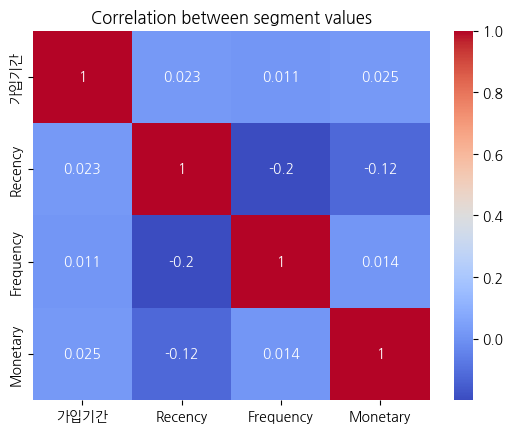

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
ax = sns.heatmap(seg.drop(['고객ID', '거래날짜', 'Total'], axis=1).corr(),
                 annot=True,
                 cmap = 'coolwarm')
plt.title('Correlation between segment values')
plt.show()

- 변수 간 상관관계가 크지 않음 -> 다중공선성 제거

# K-Means 클러스터링 다시~~

In [ ]:
seg.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary
0,USER_1358,12,2019-01-26,34551.40,339,297,116.334680
1,USER_0190,43,2019-12-18,3048.79,13,44,69.290682
2,USER_0066,33,2019-08-02,2361.48,151,42,56.225714
3,USER_0345,30,2019-01-01,1.24,364,1,1.240000
4,USER_0683,49,2019-08-30,1043.72,123,6,173.953333


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
# seg의 recency를 클 수록 좋은 것으로 변형

seg_kmeans = seg.copy()
seg_kmeans['Recency'] = seg_kmeans['Recency'].max() - seg_kmeans['Recency']

## Standard Scaler

In [ ]:
seg_kmeans.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary
0,USER_1358,12,2019-01-26,34551.40,25,297,116.334680
1,USER_0190,43,2019-12-18,3048.79,351,44,69.290682
2,USER_0066,33,2019-08-02,2361.48,213,42,56.225714
3,USER_0345,30,2019-01-01,1.24,0,1,1.240000
4,USER_0683,49,2019-08-30,1043.72,241,6,173.953333


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
seg_scaled = std_scaler.fit_transform(seg_kmeans.drop(['고객ID', '거래날짜', 'Total'], axis=1))

## 최적의 클러스터링 개수 찾기

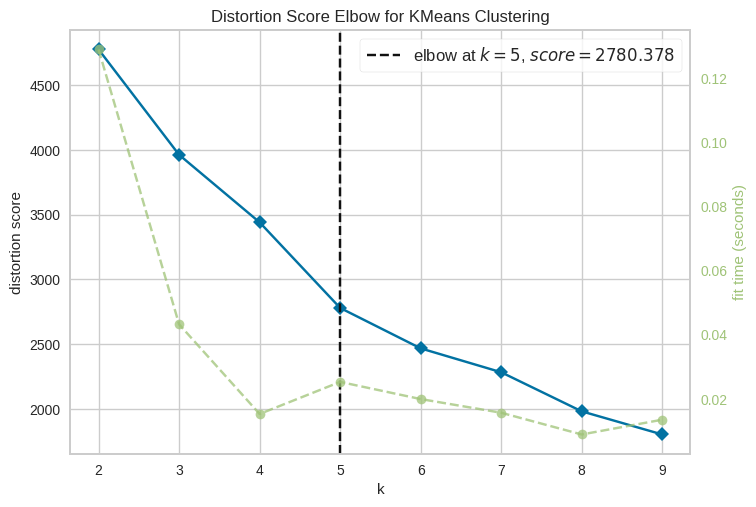

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(KMeans(random_state=0),
                              k = (2, 10))
visualizer.fit(seg_scaled)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2,11):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(seg_scaled)
  silhouette_avg = silhouette_score(seg_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)

for i, score in enumerate(silhouette_scores):
  print(f"클러스터 개수: {i+2}, 실루엣 계수: {score:.4f}")

클러스터 개수: 2, 실루엣 계수: 0.2211
클러스터 개수: 3, 실루엣 계수: 0.2266
클러스터 개수: 4, 실루엣 계수: 0.2385
클러스터 개수: 5, 실루엣 계수: 0.2518
클러스터 개수: 6, 실루엣 계수: 0.2337
클러스터 개수: 7, 실루엣 계수: 0.2268
클러스터 개수: 8, 실루엣 계수: 0.2365
클러스터 개수: 9, 실루엣 계수: 0.2388
클러스터 개수: 10, 실루엣 계수: 0.2156


Distortion Score에 대한 Elbow 방법에서 최적의
클러스터 개수는 5

Silhouette 계수 측정 시 최적의 클러스터 : 5

클러스터 개수를 5개로 정하기

## 클러스터링 진행

In [ ]:
kmeans = KMeans(n_clusters = visualizer.elbow_value_,
                random_state = 0,
                n_init=10)

kmeans.fit(seg_scaled)
seg['Cluster'] = kmeans.labels_
seg.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary,Cluster
0,USER_1358,12,2019-01-26,34551.40,339,297,116.334680,3
1,USER_0190,43,2019-12-18,3048.79,13,44,69.290682,2
2,USER_0066,33,2019-08-02,2361.48,151,42,56.225714,2
3,USER_0345,30,2019-01-01,1.24,364,1,1.240000,4
4,USER_0683,49,2019-08-30,1043.72,123,6,173.953333,0


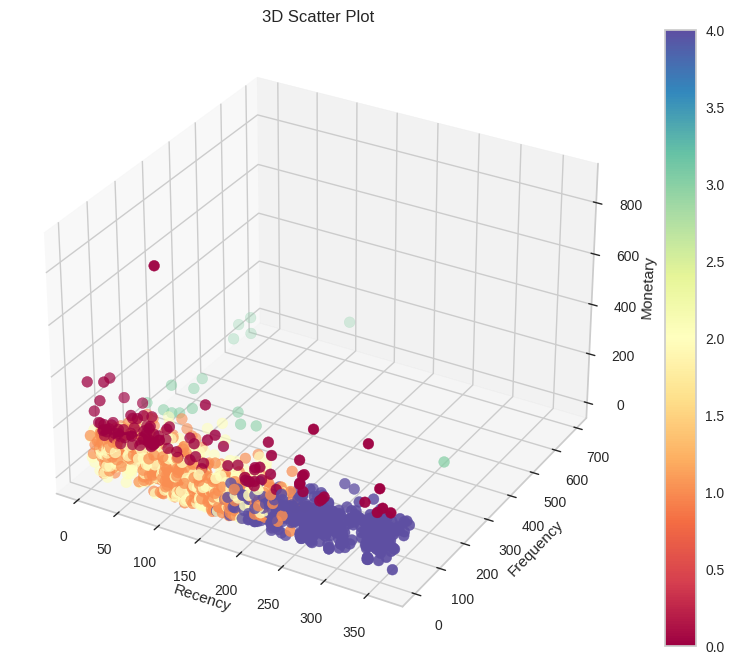

In [ ]:
import matplotlib.pyplot as plt

# 클러스터별 분포 확인
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(seg['Recency'], seg['Frequency'], seg['Monetary'], c=seg['Cluster'], s=60, cmap='Spectral')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.colorbar(scatter)
plt.show()

## 클러스터별 RFM+가입 기간 지표 시각화

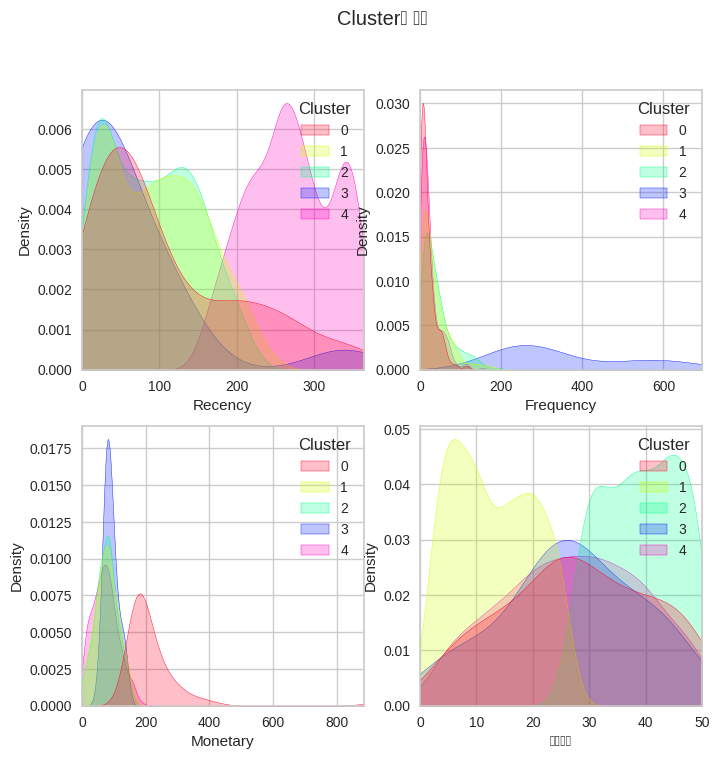

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))

sns.kdeplot(data=seg, x='Recency', hue='Cluster', fill=True, common_norm=False, ax = axes[0][0], palette = 'gist_rainbow')
sns.kdeplot(data=seg, x='Frequency', hue='Cluster', fill=True, common_norm=False, ax=axes[0][1],  palette = 'gist_rainbow')
sns.kdeplot(data=seg, x='Monetary', hue='Cluster', fill=True, common_norm=False, ax=axes[1][0],  palette = 'gist_rainbow')
sns.kdeplot(data=seg, x='가입기간', hue='Cluster', fill=True, common_norm=False, ax=axes[1][1],  palette = 'gist_rainbow')


axes[0][0].set_xlabel('Recency')
axes[0][1].set_xlabel('Frequency')
axes[1][0].set_xlabel('Monetary')
axes[1][1].set_xlabel('가입기간')

axes[0][0].set_xlim(0, seg['Recency'].max())
axes[0][1].set_xlim(0, seg['Frequency'].max())
axes[1][0].set_xlim(0, seg['Monetary'].max())
axes[1][1].set_xlim(0, seg['가입기간'].max())

plt.suptitle('Cluster별 분포')
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

# ========================================================

# 향후 1년 간의 CLTV 예측

In [ ]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00


In [ ]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [ ]:
from hyperopt import hp, fmin, tpe, rand, space_eval, Trials, STATUS_OK
from datetime import timedelta
import numpy as np
import lifetimes

In [ ]:
cltv = seg.copy()
cltv.head(3)

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary,Cluster
0,USER_1358,12,2019-01-26,34551.40,339,297,116.334680,3
1,USER_0190,43,2019-12-18,3048.79,13,44,69.290682,2
2,USER_0066,33,2019-08-02,2361.48,151,42,56.225714,2


In [ ]:
first_date_df = df_sales.groupby('고객ID', as_index=False)['거래날짜'].min()

In [ ]:
first_date_df.head()

,고객ID,최초거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-03-24
2,USER_0002,2019-06-22
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15


In [ ]:
first_date_df.rename(columns={'거래날짜' : '최초거래날짜'},
                     inplace=True)

In [ ]:
cltv = pd.merge(cltv, first_date_df, how='left', on='고객ID')

In [ ]:
# 집계일은 가장 최근 거래일로 설정
target_date = cltv['거래날짜'].max()

# Recency 변경
# 고객별 첫 구매일부터 마지막 구매일까지의 기간
cltv['Recency'] = cltv['거래날짜'] - cltv['최초거래날짜']

# T: 고객별 첫 구매일부터 집계일까지의 기간
cltv['T'] = target_date - cltv['최초거래날짜']

In [ ]:
cltv['Recency'] = cltv['Recency'].dt.days
cltv['T'] = cltv['T'].dt.days

cltv['Recency'] = cltv['Recency'] / 7
cltv['T'] = cltv['T'] / 7

Frequency가 1인 고객은 '반복적인' 구매를 한 고객이 아니라서 BG/NBD 모델 가정에서 벗어난 고객들이기 때문에 제외해야 함

In [ ]:
len(cltv[cltv['Frequency'] <= 1])

66

In [ ]:
cltv = cltv[cltv['Frequency'] > 1]

In [ ]:
cltv.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary,Cluster,최초거래날짜,T
0,USER_1358,12,2019-01-26,34551.40,3.571429,297,116.334680,3,2019-01-01,52.0
1,USER_0190,43,2019-12-18,3048.79,50.142857,44,69.290682,1,2019-01-01,52.0
2,USER_0066,33,2019-08-02,2361.48,30.428571,42,56.225714,1,2019-01-01,52.0
3,USER_0345,30,2019-01-01,1.24,0.000000,1,1.240000,1,2019-01-01,52.0
4,USER_0683,49,2019-08-30,1043.72,34.428571,6,173.953333,0,2019-01-01,52.0


In [ ]:

metrics_df = lifetimes.utils.summary_data_from_transaction_data(df_sales,
                                                                customer_id_col = '고객ID',
                                                                datetime_col='거래날짜',
                                                                monetary_value_col='Total',
                                                                observation_period_end = target_date)
metrics_df.head()

,frequency,recency,T,monetary_value
고객ID,,,,
USER_0000,0.0,0.0,107.0,0.000
USER_0001,2.0,223.0,282.0,1309.425
USER_0002,1.0,119.0,192.0,665.090
USER_0003,0.0,0.0,17.0,0.000
USER_0004,0.0,0.0,107.0,0.000


In [ ]:
whole_filtered_df = metrics_df[metrics_df['frequency'] > 0]

## 최적의 파라미터(penalizer_coef) 찾기

In [ ]:
holdout_days = 90
calibration_end_date = target_date - timedelta(days = holdout_days)

metrics_cal_df = lifetimes.utils.calibration_and_holdout_data(df_sales,
                                                              customer_id_col = '고객ID',
                                                              datetime_col = '거래날짜',
                                                              calibration_period_end = calibration_end_date,
                                                              observation_period_end = target_date,
                                                              monetary_value_col='Total')

calibration 기간 동안의 RFMT를 계산한 값은 _cal이 붙고, holdout 기간 동안의 F와 M을 계산한 값은 _holdout이 붙음

duration_holdout은 holdout data이 며칠인지 나타내는 컬럼

In [ ]:
metrics_cal_df.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
고객ID,,,,,,,
USER_0000,0.0,0.0,17.0,0.0,0.0,0.000000,90.0
USER_0001,0.0,0.0,192.0,0.0,2.0,90.305172,90.0
USER_0002,0.0,0.0,102.0,0.0,1.0,110.848333,90.0
USER_0004,0.0,0.0,17.0,0.0,0.0,0.000000,90.0
USER_0005,0.0,0.0,40.0,0.0,0.0,0.000000,90.0


In [ ]:
filtered_df = metrics_cal_df[metrics_cal_df['frequency_cal'] > 0]

In [ ]:
# 평가 지표: default는 MSE
def score_model(actuals, predicted, metric='mse'):

    metric = metric.lower()

    # MSE / RMSE
    if metric=='mse' or metric=='rmse':
        val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    elif metric=='rmse':
        val = np.sqrt(val)
    # MAE
    elif metric=='mae':
        val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]
    else:
        val = None

    return val

# BG/NBD 모형 평가
def evaluate_bgnbd_model(param):

    data   = inputs
    l2_reg = param

    # 모형 적합
    model = BetaGeoFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

    # 모형 평가
    frequency_actual = data['frequency_holdout']
    frequency_predicted = model.predict(data['duration_holdout']
                                        , data['frequency_cal']
                                        , data['recency_cal']
                                        , data['T_cal']
                                       )
    mse = score_model(frequency_actual, frequency_predicted, 'mse')

    return {'loss': mse, 'status': STATUS_OK}

# Gamma/Gamma 모델 평가
def evaluate_gg_model(param):

    data   = inputs
    l2_reg = param

    # GammaGamma 모형 적합
    model = GammaGammaFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['monetary_value_cal'])

    # 모형 평가
    monetary_actual = data['monetary_value_holdout']
    monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
    mse = score_model(monetary_actual, monetary_predicted, 'mse')

    # return score and status
    return {'loss': mse, 'status': STATUS_OK}

In [ ]:
search_space = hp.uniform('l2', 0.0, 1.0)
algo = tpe.suggest
trials = Trials()
inputs = filtered_df

argmin = fmin(
  fn = evaluate_bgnbd_model, # 목적함수
  space = search_space,      # 파라미터 공간
  algo = algo,               # 최적화 알고리즘: Tree of Parzen Estimators (TPE)
  max_evals=100,             # 반복수
  trials=trials
  )

l2_bgnbd = space_eval(search_space,argmin)
print(l2_bgnbd)

100%|██████████| 100/100 [00:14<00:00,  6.69trial/s, best loss: 0.8132844313413489]
0.0006997697998116885


BG/NBD의 최적 penalizer_coef = 0.0006997697998116885

In [ ]:
trials = Trials()

# GammaGamma
argmin = fmin(
  fn = evaluate_gg_model,
  space = search_space,
  algo = algo,
  max_evals=100,
  trials=trials
  )

l2_gg = space_eval(search_space,argmin)
print(l2_gg)

100%|██████████| 100/100 [00:08<00:00, 12.11trial/s, best loss: 531.3918833731183]
0.005419234082901014


Gamma-Gamma의 최적 penalizer_coed = 0.005419234082901014

## BG/NBD 모델 MSE

In [ ]:
bgf = BetaGeoFitter(penalizer_coef = l2_bgnbd)
bgf.fit(filtered_df['frequency_cal'], filtered_df['recency_cal'], filtered_df['T_cal'])

frequency_actual = filtered_df['frequency_holdout']
frequency_predicted = bgf.predict(filtered_df['duration_holdout'],
                                  filtered_df['frequency_cal'],
                                  filtered_df['recency_cal'],
                                  filtered_df['T_cal'])
mse = score_model(frequency_actual, frequency_predicted, 'mse')
print('MSE :',mse)

MSE : 0.8132844313413489


구매 일수에 대한 평균 제곱 오차는 +-0.8일,
이에 루트를 취한 평균 오차(RMSE)는 +-0.89일

In [ ]:
gg = GammaGammaFitter(penalizer_coef = l2_gg)
gg.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = gg.conditional_expected_average_profit(filtered_df['frequency_holdout'],
                                                            filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')
print('MSE :', mse)

MSE : 531.3918833731183


구매 금액에 대한 평균 제곱 오차는 +- \$531,
이에 루트를 취한 평균 오차(RMSE)는 +- \$23

In [ ]:
cltv_df = whole_filtered_df.copy()
cltv_df['cltv'] = gg.customer_lifetime_value(bgf,
                                             cltv_df['frequency'],
                                             cltv_df['recency'],
                                             cltv_df['T'],
                                             cltv_df['monetary_value'],
                                             time=12, # 향후 1년 간 cltv
                                             #discount_rate=0.01
                                             )

In [ ]:
cltv_df = cltv_df.reset_index()
cltv_df.head()

,고객ID,frequency,recency,T,monetary_value,cltv
0,USER_0001,2.0,223.0,282.0,1309.425000,2651.964342
1,USER_0002,1.0,119.0,192.0,665.090000,866.006766
2,USER_0006,1.0,30.0,219.0,635.300000,161.780660
3,USER_0008,1.0,139.0,179.0,6545.830000,11330.939817
4,USER_0009,3.0,72.0,171.0,745.476667,1271.039446


In [ ]:
seg_cltv = seg.copy()
seg_cltv = pd.merge(seg_cltv, cltv_df[['고객ID', 'cltv']], how='left', on='고객ID')
seg_cltv['cltv'].fillna(0, inplace=True)
seg_cltv.head()

,고객ID,가입기간,거래날짜,Total,Recency,Frequency,Monetary,Cluster,cltv
0,USER_1358,12,2019-01-26,34551.40,339,297,116.334680,3,1.327227
1,USER_0190,43,2019-12-18,3048.79,13,44,69.290682,2,2315.352984
2,USER_0066,33,2019-08-02,2361.48,151,42,56.225714,2,1074.104618
3,USER_0345,30,2019-01-01,1.24,364,1,1.240000,4,0.000000
4,USER_0683,49,2019-08-30,1043.72,123,6,173.953333,0,375.639502


In [ ]:
seg_cltv['Cluster'].unique()

array([3, 2, 4, 0, 1], dtype=int32)

<Axes: xlabel='cltv', ylabel='Density'>

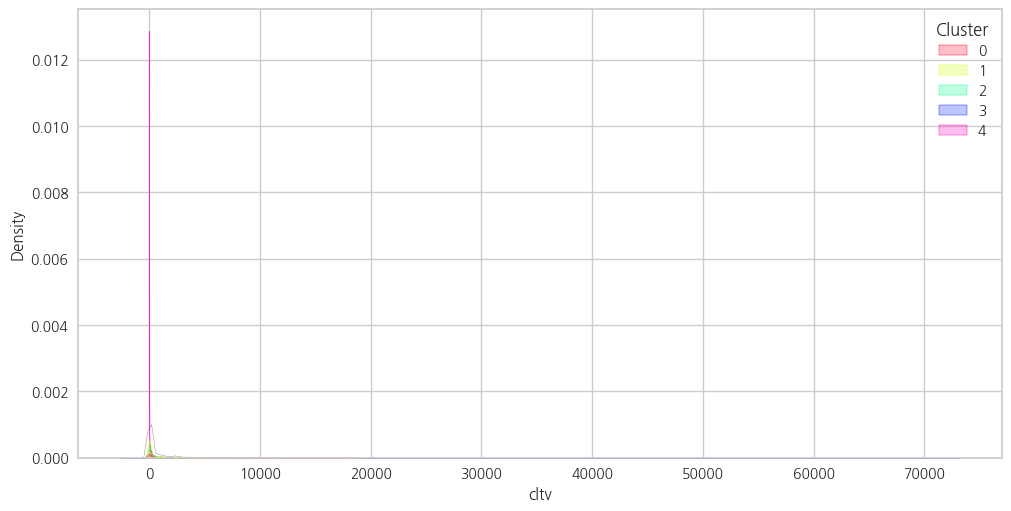

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(x='cltv', data=seg_cltv, fill=True, ec='gray', fc='white', bw=.05, ax=ax)
sns.kdeplot(x='cltv', data=seg_cltv, hue='Cluster', fill=True, bw=.05, ax=ax, palette = 'gist_rainbow')

In [ ]:
seg_cltv['cltv'].describe()

,cltv
count,1468.000000
mean,1353.959357
std,3728.235468
min,0.000000
25%,0.000000
50%,0.312056
75%,1022.387867
max,75728.743708


In [ ]:
seg_cltv.groupby('Cluster')['cltv'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,115.0,1548.925665,3763.922401,0.000000,0.00000,0.000000,736.410724,18544.777349
1,489.0,1395.093282,2572.734871,0.000000,0.00000,113.266818,1728.934952,18731.186833
2,428.0,1645.422603,2878.343155,0.000000,0.00000,257.702966,2067.821991,18136.289967
3,17.0,18525.470504,17500.818765,1.327227,8263.15624,11143.964582,27096.125173,70577.547761
4,419.0,43.634190,130.040750,0.000000,0.00000,0.000000,9.793921,1315.179677


- Cluster 0 : 왼쪽(작은 값)으로 치우쳐있음
- Cluster 1 : 왼쪽(작은 값)으로 치우쳐있으나, 클러스터 0에 비해 약간 양호
- Cluster 2 : 왼쪽(작은 값)으로 치우쳐있으나, 클러스터 1에 비해 약간 양호
- Cluster 3 : 오른쪽(큰 값)으로 완전히 치우쳐있는, CLTV가 가장 우수한 VIP
- Cluster 4 : CLTV가 아주 낮은, 충성도가 낮은 이탈 고객

<Axes: xlabel='cltv', ylabel='Density'>

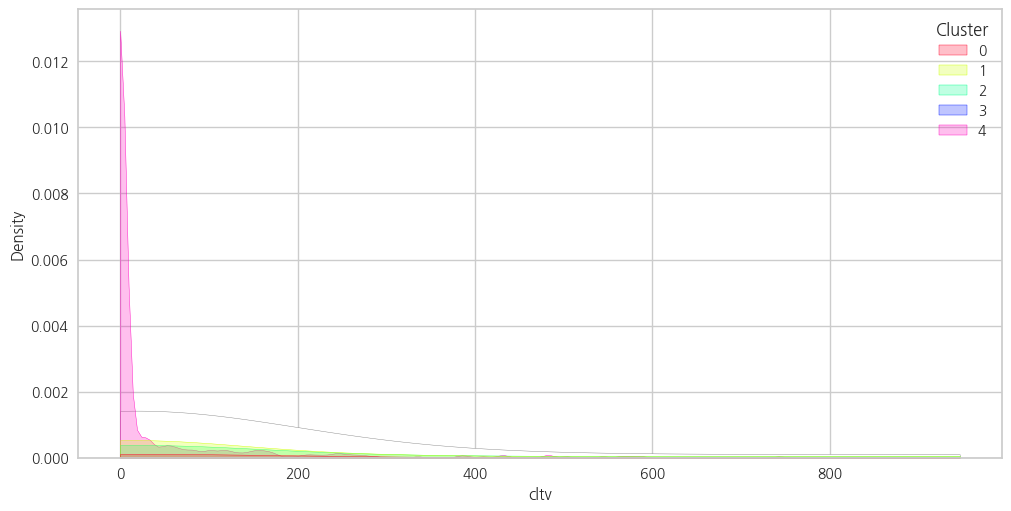

In [ ]:
cltv_q3 = seg_cltv['cltv'].quantile(0.75)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(x='cltv', data=seg_cltv, fill=True, ec='gray', fc='white', bw=.05, ax=ax, clip=(0, cltv_q3))
sns.kdeplot(x='cltv', data=seg_cltv, hue='Cluster', fill=True, bw=.05, ax=ax, palette = 'gist_rainbow', clip=(0,cltv_q3))

<Axes: xlabel='cltv', ylabel='Density'>

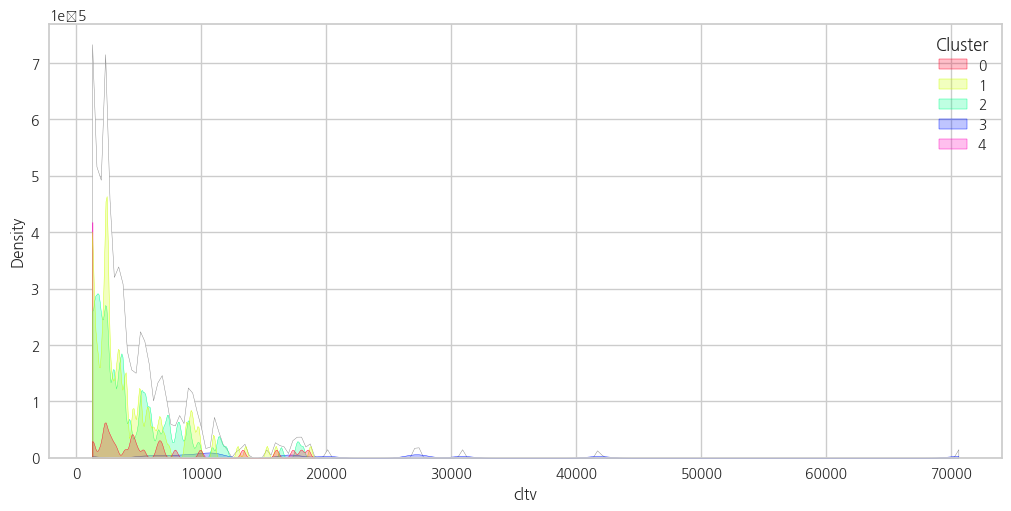

In [ ]:
cltv_mean = seg_cltv['cltv'].mean()
cltv_max = seg_cltv['cltv'].max()

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(x='cltv', data=seg_cltv, fill=True, ec='gray', fc='white', bw=.05, ax=ax, clip=(cltv_mean, cltv_max))
sns.kdeplot(x='cltv', data=seg_cltv, hue='Cluster', fill=True, bw=.05, ax=ax, palette = 'gist_rainbow', clip=(cltv_mean,cltv_max))

(0.0, 70577.547760808)

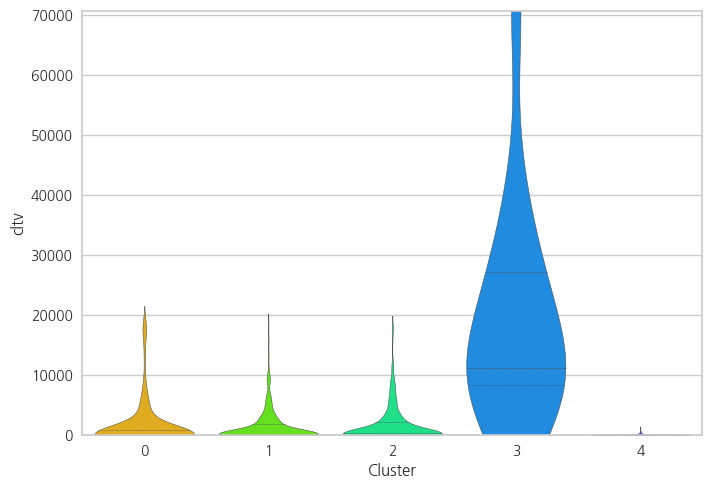

In [ ]:
ax = sns.violinplot(data = seg_cltv,
               x=seg_cltv['Cluster'],
               y=seg_cltv['cltv'],
               palette = 'gist_rainbow',
               inner = 'quartile')

ax.set_ylim([seg_cltv['cltv'].min(), seg_cltv['cltv'].max()])

평균 CLTV 분포로 보았을 때
- Cluster 0 : 왼쪽(작은 값)으로 치우쳐있음
- Cluster 1 : 왼쪽(작은 값)으로 치우쳐있으나, 클러스터 0에 비해 약간 양호
- Cluster 2 : 왼쪽(작은 값)으로 치우쳐있으나, 클러스터 1에 비해 약간 양호
- Cluster 3 : 오른쪽(큰 값)으로 완전히 치우쳐있는, CLTV가 가장 우수한 VIP
- Cluster 4 : CLTV가 아주 낮은, 충성도가 낮은 이탈 고객

평균 CLTV 순위
- 1위 Cluster 3(18525)
- 2위 Cluster 2(1645)
- 3위 Cluster 0(1548)
- 4위 Cluster 1(1395)
- 5위 Cluster 4(43.6)

In [ ]:
total_cltv_per_cluster = pd.merge(seg_cltv.groupby('Cluster', as_index=False)['cltv'].mean(),
         seg_cltv.groupby('Cluster', as_index=False).size(),
         how='left',
         on='Cluster')

total_cltv_per_cluster['total'] = total_cltv_per_cluster['cltv'] * total_cltv_per_cluster['size']
total_cltv_per_cluster = total_cltv_per_cluster.sort_values(by='total', ascending=False).reset_index(drop=True)
total_cltv_per_cluster

,Cluster,cltv,size,total
0,2,1645.422603,428,704240.873885
1,1,1395.093282,489,682200.614778
2,3,18525.470504,17,314932.998560
3,0,1548.925665,115,178126.451514
4,4,43.634190,419,18282.725737


## **총 CLTV 순위**(클러스터별 평균 CLTV * 클러스터별 고객 수)


CLTV 총 합 순위 & 인원수 & 특이사항
- 1위 Cluster 2(704240, 428명, 가입기간 짧음)
- 2위 Cluster 1(682200, 489명,  가입기간 김)
- 3위 Cluster 3(314932, 17명)
- 4위 Cluster 0(178126, 115명, Monetary 가장 오른쪽으로 우수)
- 5위 Cluster 4(18282, 419명, Recency 가장 오른쪽.


➡ Cluster 4는 이탈 고객 그룹임에도 불구하고, 총 인원이 전체 인원 중 28%라는 적지 않은 비중을 차지합니다. 즉, Cluster 4의 고객을 얼마만큼 일반 고객으로 전환시키냐에 따라서 상당한 추가 수익을 얻을 수 있습니다.

➡ 이에 Cluster 4의 이탈을 방지할 솔루션을 찾기 위해 자세한 분석을 수행합니다.

# Cluster 4 추가 분석

## 이탈 시기

In [ ]:
sales_c = pd.merge(df_sales, seg_cltv[['고객ID', 'Cluster']],
                   how='left', on='고객ID')

c4_last_date = sales_c[sales_c['Cluster']==4].groupby('고객ID', as_index=False)['거래날짜'].max()
c4_last_date.head()

,고객ID,거래날짜
0,USER_0024,2019-04-13
1,USER_0026,2019-04-10
2,USER_0027,2019-05-23
3,USER_0029,2019-03-29
4,USER_0044,2019-07-20


In [ ]:
import datetime

def get_month_and_week(date_obj):
  """
  입력된 날짜 문자열을 datetime 객체로 변환하고,
  해당 날짜가 속한 월과 주차를 반환하는 함수입니다.

  Args:
    date_str: 날짜 문자열 (예: '2023-12-25')

  Returns:
    tuple: (월, 주차)
  """

  # 해당 연도의 첫 번째 월요일 구하기
  first_monday = date_obj.replace(day=1)
  while first_monday.weekday() != 0:
    first_monday += datetime.timedelta(days=1)

  # 입력된 날짜와 첫 번째 월요일 사이의 날짜 차이 계산 (일 단위)
  days_since_first_monday = (date_obj - first_monday).days

  # 주차 계산 (1주일은 7일)
  week_number = (days_since_first_monday // 7) + 1
  if week_number == 0:
    week_number = week_number + 1

  return date_obj.month, week_number

In [ ]:
c4_last_date['거래날짜_월'] = c4_last_date['거래날짜'].dt.month

In [ ]:
_, c4_last_date['거래날짜_주차'] = zip(*c4_last_date['거래날짜'].apply(get_month_and_week))

In [ ]:
c4_last_date.head()

,고객ID,거래날짜,거래날짜_월,거래날짜_주차
0,USER_0024,2019-04-13,4,2
1,USER_0026,2019-04-10,4,2
2,USER_0027,2019-05-23,5,3
3,USER_0029,2019-03-29,3,4
4,USER_0044,2019-07-20,7,3


In [ ]:
c4_last_date_group = c4_last_date.groupby('거래날짜_월', as_index=False).size()
c4_last_date_group.head()

,거래날짜_월,size
0,1,91
1,2,29
2,3,71
3,4,91
4,5,65


In [ ]:
c4_last_date['거래날짜_주차'].unique()

array([2, 3, 4, 1, 5])

In [ ]:
!pip install calmap

In [ ]:
c4_last_date.head()

,고객ID,거래날짜,거래날짜_월,거래날짜_주차
0,USER_0024,2019-04-13,4,2
1,USER_0026,2019-04-10,4,2
2,USER_0027,2019-05-23,5,3
3,USER_0029,2019-03-29,3,4
4,USER_0044,2019-07-20,7,3


In [ ]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
events

,0
2015-12-11,-0.998662
2014-06-17,-0.136021
2014-11-04,-0.240216
2014-02-07,0.217959
2014-05-05,-0.188949
...,...
2014-12-12,0.065725
2015-05-05,1.582024
2015-03-21,-0.347094
2015-03-17,0.982412


In [ ]:
c4_last_date_group2 = c4_last_date.groupby(['거래날짜_월', '거래날짜_주차'], as_index=False).size()
c4_last_date_group2.head()

,거래날짜_월,거래날짜_주차,size
0,1,1,33
1,1,2,15
2,1,3,19
3,1,4,24
4,2,1,12


<Axes: >

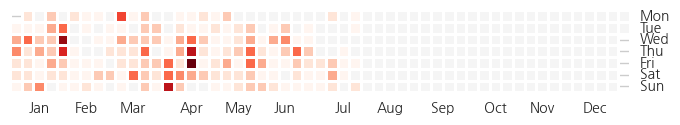

In [ ]:
import matplotlib as mpl
import calmap

calmap.yearplot(c4_last_date.groupby('거래날짜').size(), year=2019)

- 1월과 4월에 이탈이 집중되는 경향을 보임

## 구매 주기

In [ ]:
sales_c_4 = sales_c[sales_c['Cluster'] == 4]

In [ ]:
sales_c_4.head(2)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,Total,Cluster
46,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.5,Clicked,1.24,4
105,USER_1347,Transaction_0050,2019-01-02,Product_0951,Office,1,3.08,6.5,Clicked,3.08,4


In [ ]:
sales_c_4 = sales_c_4.sort_values(['고객ID', '거래날짜'])
sales_c_4['거래날짜_gap'] = sales_c_4.groupby('고객ID', as_index=False)['거래날짜'].diff().dt.days
avg_purchase_cycle = sales_c_4.groupby('고객ID')['거래날짜_gap'].mean().reset_index()
avg_purchase_cycle = avg_purchase_cycle.dropna()
avg_purchase_cycle.head()

,고객ID,거래날짜_gap
0,USER_0024,0.000000
1,USER_0026,0.623288
2,USER_0027,0.000000
3,USER_0029,0.100000
4,USER_0044,16.500000


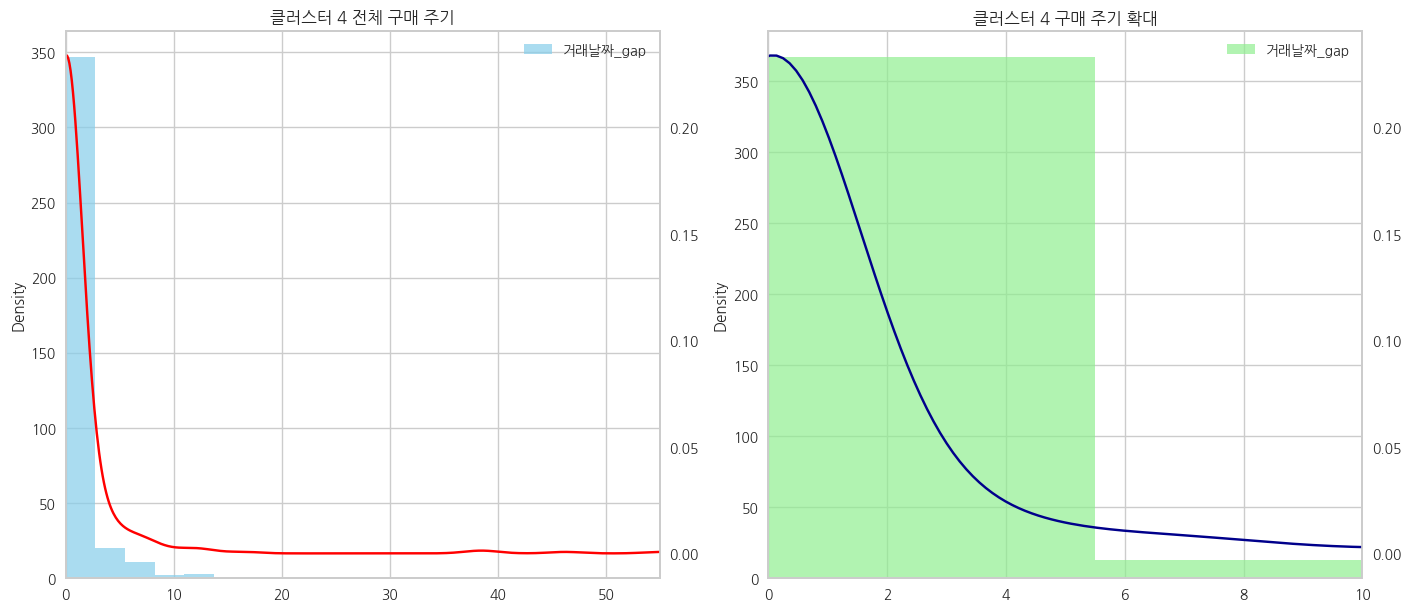

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

ax1 = avg_purchase_cycle.plot.hist(
    bins=20, ax=axes[0], alpha=0.7, label='Histogram', color='skyblue'
)
avg_purchase_cycle.plot.kde(ax=ax1, secondary_y=True, label='KDE', color='red')
ax1.set_xlim(0, avg_purchase_cycle['거래날짜_gap'].max())
ax1.set_title('클러스터 4 전체 구매 주기', fontsize=12)
ax1.legend(loc='upper right')

ax2 = avg_purchase_cycle.plot.hist(
    bins=10, ax=axes[1], alpha=0.7, label='Histogram', color='lightgreen'
)
avg_purchase_cycle.plot.kde(ax=ax2, secondary_y=True, label='KDE', color='darkblue')
ax2.set_xlim(0, 10)
ax2.set_title('클러스터 4 구매 주기 확대', fontsize=12)
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

- 구매 주기는 0일-5일 정도로 나타남

## 월별 구매량 + 거래 건수 트렌드

In [ ]:
sales_c_4['거래날짜_월'] = sales_c_4['거래날짜'].dt.month

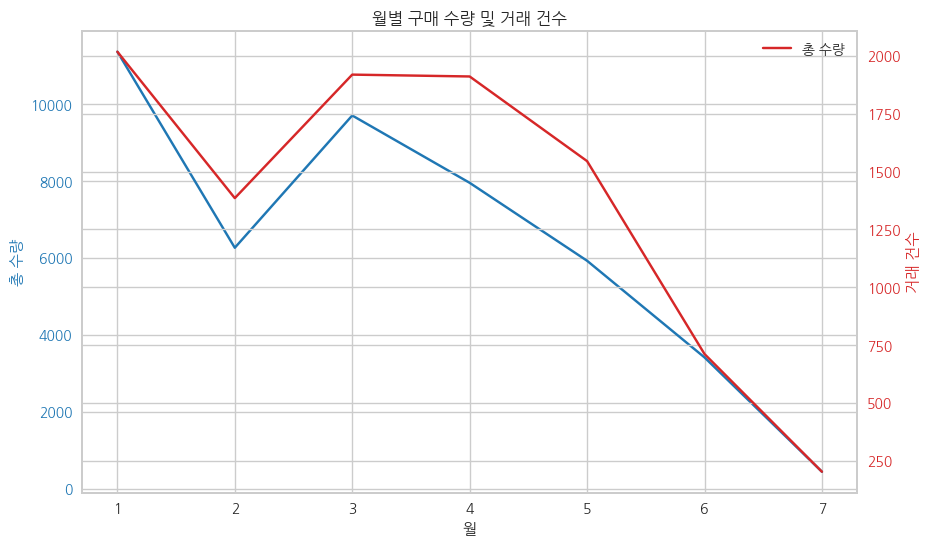

In [ ]:
monthly_data = sales_c_4.groupby('거래날짜_월').agg({'수량' : 'sum',                                         '고객ID' : 'count'})
monthly_data.columns = ['총 수량', '거래 건수']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 왼쪽 y축 (수량)
color = 'tab:blue'
ax1.set_xlabel('월')
ax1.set_ylabel('총 수량', color=color)
ax1.plot(monthly_data.index, monthly_data['총 수량'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 y축 (거래 건수)
ax2 = ax1.twinx()  # 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('거래 건수', color=color)
ax2.plot(monthly_data.index, monthly_data['거래 건수'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 설정
plt.title('월별 구매 수량 및 거래 건수')
plt.legend(['총 수량', '거래 건수'])
plt.grid(True)
plt.show()

- 월별 구매량과 거래 건수가 비슷한 추세를 보임
- 특히 3월을 기점으로 구매가 비활성화되고 있음을 알 수 있음
- 이탈 원인을 더 자세히 들여다보기 위해 어떤 카테고리를 주로 구매했는지 파악하기

## 월별 구매 카테고리 트렌드

In [ ]:
sales_c_4.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,Total,Cluster,거래날짜_월
46,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.5,Clicked,1.24,4,1
105,USER_1347,Transaction_0050,2019-01-02,Product_0951,Office,1,3.08,6.5,Clicked,3.08,4,1
142,USER_0922,Transaction_0072,2019-01-02,Product_0777,Apparel,1,31.35,6.5,Clicked,31.35,4,1
143,USER_0922,Transaction_0072,2019-01-02,Product_0778,Apparel,1,19.80,6.5,Not Used,19.80,4,1
144,USER_0922,Transaction_0072,2019-01-02,Product_0781,Apparel,1,19.80,6.5,Clicked,19.80,4,1


In [ ]:
top5_cate = sales_c_4.groupby('제품카테고리', as_index=False).size().sort_values(by='size', ascending=False).head(5)['제품카테고리'].tolist()

In [ ]:
c4_monthly_cate = sales_c_4.groupby(['거래날짜_월', '제품카테고리'], as_index=False)['수량'].sum()
c4_monthly_cate_filtered = c4_monthly_cate[c4_monthly_cate['제품카테고리'].isin(top5_cate)]
c4_monthly_cate_filtered.head()

,거래날짜_월,제품카테고리,수량
1,1,Apparel,737
4,1,Drinkware,1255
10,1,Lifestyle,951
13,1,Nest-USA,1112
15,1,Office,6021


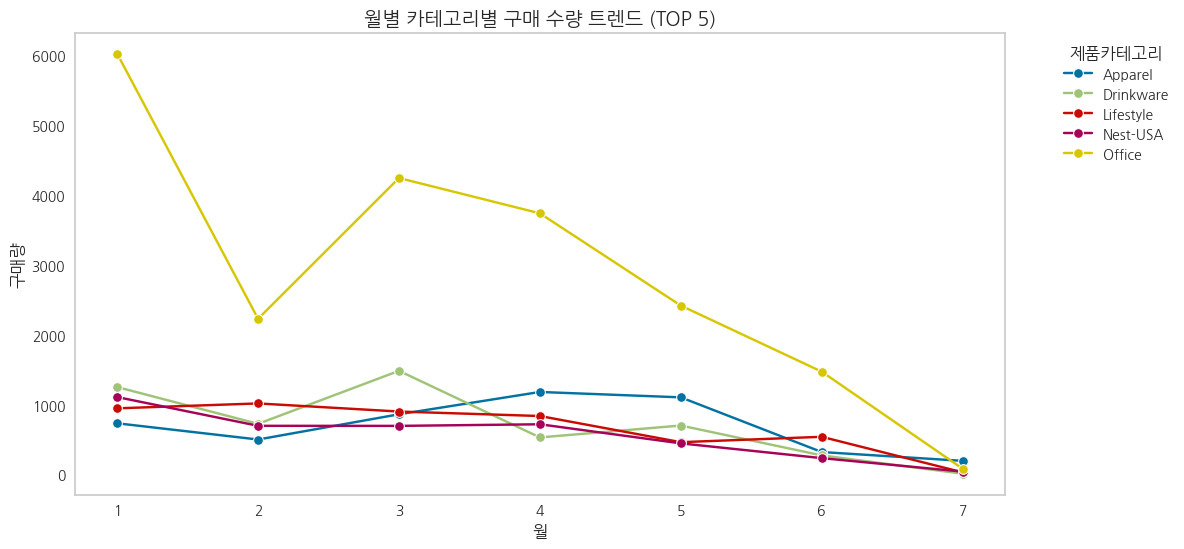

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 라인 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=c4_monthly_cate_filtered, x='거래날짜_월', y='수량', hue='제품카테고리', marker='o')
plt.title('월별 카테고리별 구매 수량 트렌드 (TOP 5)', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('구매량', fontsize=12)
plt.legend(title='제품카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

- Office 외의 카테고리는 모두 비슷한 구매량을 유지함
- Office 카테고리의 구매량은 1월과 3월에 잠시 증가한 후, 급격히 감소하는 추세를 보임
➡ 지금까지의 정보를 통해, 클러스터 4의 고객군은 '필요한 학용품(=Office, 사무용품)과 의류를 함께 구매한 뒤 바로 이탈하는 1020 고객들' 로 유추됨

➡ '새학기 시즌'이라는 한시적 이벤트가 끝났기 때문에 이탈한 것인지, 다른 이유가 있는지 알아보기 위해 배송비에 대해서도 점검 필요

## 타 클러스터와 구매금액 대비 배송료 비중 비교

> 구매금액 = (평균금액*수량)

In [ ]:
sales_c.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,Total,Cluster
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,3
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,3
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,3


In [ ]:
sales_c['배송료 비율'] = sales_c['배송료'] / sales_c['Total'] * 100

(0.0, 46.3623395149786)

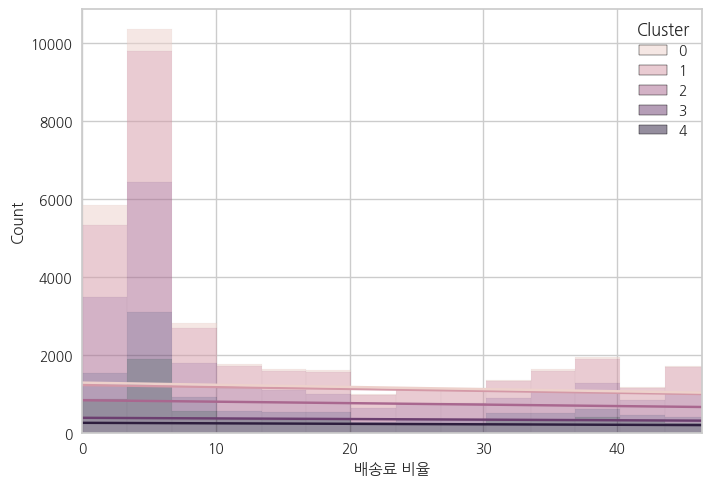

In [ ]:
sns.histplot(data=sales_c, x="배송료 비율", hue="Cluster",
             multiple='stack', kde=True,
             )

plt.xlim(0, sales_c['배송료 비율'].quantile(0.66))

In [ ]:
ship_fee_c = sales_c.groupby('Cluster', as_index=False)['배송료 비율'].mean()
ship_fee_c = pd.merge(ship_fee_c,
                      sales_c.groupby('Cluster', as_index=False)['Total'].mean(),
                      how='left',
                      on='Cluster')
ship_fee_c.sort_values(by='배송료 비율', ascending=False)

,Cluster,배송료 비율,Total
3,3,80.659394,93.968518
1,1,76.467876,83.361246
2,2,72.935463,82.676257
4,4,72.132095,78.944141
0,0,52.506347,205.783525


➡ Cluster 4는 평균 구매 금액은 가장 낮으면서 배송료 비율은 그 값이 높은 그룹과 비슷한 수준을 보임

➡ 즉, 배송비가 부담이 되어서 이탈했을 가능성이 있음

## 온오프라인 마케팅과 구매 수량 간의 관계

In [ ]:
df_marketing['날짜_월'] = df_marketing['날짜'].dt.month
monthly_marketing = df_marketing.groupby('날짜_월', as_index=False).agg({ '오프라인비용' : ['sum'],
                                                                      '온라인비용' : ['sum']})
monthly_marketing.columns = monthly_marketing.columns.droplevel(1)
sales_4 = sales_c[(sales_c['Cluster']==4)]
sales_4['거래날짜_월'] = sales_4['거래날짜'].dt.month

monthly_frequency_4 = sales_4.groupby(['거래날짜_월'], as_index=False)['수량'].sum()
monthly_frequency_4.head()

,거래날짜_월,수량
0,1,11360
1,2,6262
2,3,9702
3,4,7951
4,5,5924


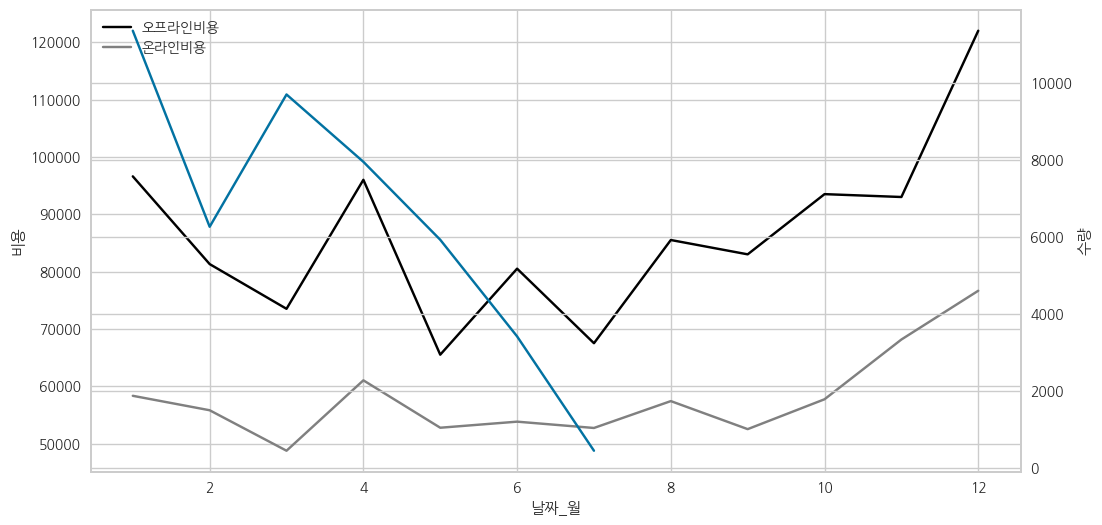

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure와 Axes 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축에 오프라인비용과 온라인비용 그리기
sns.lineplot(data=monthly_marketing, x='날짜_월', y='오프라인비용', label='오프라인비용', ax=ax1, color='black')
sns.lineplot(data=monthly_marketing, x='날짜_월', y='온라인비용', label='온라인비용', ax=ax1, color='grey')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 y축에 size 그리기
sns.lineplot(data=monthly_frequency_4, x='거래날짜_월', y='수량', ax=ax2, palette = 'Set1')

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# y축 레이블 설정
ax1.set_ylabel('비용')
ax2.set_ylabel('수량')

plt.show()

- 3월에 클러스터 4의 구매량은 가장 높았으나, 마케팅 비용은 감소하였음
- 또한 4월과 6월에 마케팅 비용이 증가한 데에 반해 클러스터 4의 구매량은 지속적으로 감소하였음
- 즉, 2019년에 진행한 마케팅은 클러스터 4를 타깃으로 선정하지 못 했거나, 효과가 없었음을 알 수 있음
➡ 따라서, 클러스터 4를 타깃으로 마케팅을 진행한다고 가정할 때, 오프라인 마케팅 성과에 도움이 될 수 있도록 클러스터 4 고객의 추가 특성을 분석하고자 함

### Cluster 4 고객 지역

In [ ]:
df_cust.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
sales_cust_4 = pd.merge(sales_4, df_cust,
                        how='left', on='고객ID')

sales_cust_4_distinct = sales_cust_4.drop_duplicates('고객ID')
sales_cust_4_distinct.head(2)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,Total,Cluster,배송료 비율,거래날짜_월,성별,고객지역,가입기간
0,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.5,Clicked,1.24,4,524.193548,1,여,California,30
1,USER_1347,Transaction_0050,2019-01-02,Product_0951,Office,1,3.08,6.5,Clicked,3.08,4,211.038961,1,여,New Jersey,24


In [ ]:
location_4 = sales_cust_4_distinct.groupby('고객지역').size()
location_4

,0
고객지역,
California,143
Chicago,122
New Jersey,40
New York,98
Washington DC,16


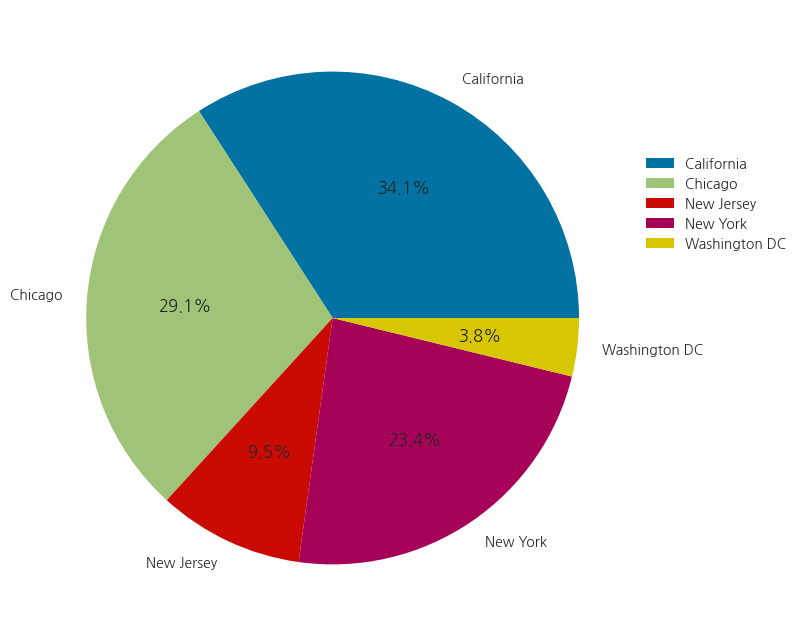

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(location_4,
        labels = location_4.index,
        autopct='%.1f%%')

plt.legend(location_4.index, loc=(1, 0.6))

# Cluster 4에 대한 전략 제안

## Cluster 4 선정 이유

```
➡ Cluster 4는 이탈 고객 그룹임에도 불구하고, 총 인원이 전체 인원 중 28%라는 적지 않은 비중을 차지합니다.
즉, 해당 고객들은 재구매 고객으로 전환될 경우 상당한 추가 수익을 창출할 수 있는 잠재 고객층으로 판단됩니다.
```

## 기대 효과

> Cluster 4 다음으로 CLTV가 높았던 Cluster 1의 CLTV를 기준으로 추가 수익을 계산해보았습니다.


```
Cluster 1 평균 CLTV의 50%인 $697 달성 시 :
총 매출 292,043(15.38%) 증가

Cluster 1 평균 CLTV의 75%인 $1046 달성 시 :
총 매출 438,274(23.09%) 증가

Cluster 1 평균 CLTV의 100%인 $1,395 달성 시 :
총 매출 584,505(30.8%) 증가
```



## 고객 특성

```
<예상 그룹>
학생 고객 : 주로 학용품과 의류를 구매하며, 새학기 시즌에 구매가 집중됨
단기 고객 : 구매 주기가 짧고, 특정 시기에 집중적으로 구매 후 이탈하는 경향을 보임

<특징>
가격 민감도 : 낮은 평균 구매 금액과 높은 배송료 비율에 민감하게 반응함
지역 : 캘리포니아, 시카고, 뉴욕 지역에 집중 분포되어있음
```



## 전략

```
※ 요약
해당 클러스터는 3월에 증가한 흥미를 한 해 동안 꾸준히 이어가는 것이 중요합니다.

이를 위해선 시즌별 Office, Apperal 신상품 입고, 배송비 완화 정책 등의 전략이 필요합니다.
```

**Office & Apperal**
다양한 시즌 상품 개발 : 각 계절에 맞는 테마 상품을 개발하여 계절에 관계없이 꾸준한 수요 창출

(고객 연령층이 1020일 경우)
이벤트성 프로모션 :
새학기 시즌 외에도 중간고사, 기말고사, 소풍 등 학사 일정에 맞춘 할인 쿠폰 또는 참여형 이벤트를 진행합니다.

**이탈 방지**

구매 주기는 0일-5일에 집중되어있으므로, 마지막 구매일로부터 5일을 주기로 광고성 푸시 알람이나 기간제 할인 쿠폰을 제공합니다.

# ============================================================